# TITANIC DISASTER

---

# 1. Import Libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import itertools
import plotly.express as px
import itertools

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingRegressor, VotingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


---

# 2. Reading data

Load data from the train and test CSV files.

In [150]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


from Kaggle repository.

In [151]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

From the local drive.

In [152]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

# 3. Data Exploration

In this section we will try to draw insights from the Data, and get familiar with it, so we can create more
efficient models.

## Training data

In [153]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
print("Train data:", train.shape)
print("_"*100)
print("Test data:", test.shape)

Train data: (891, 12)
____________________________________________________________________________________________________
Test data: (418, 11)


In [155]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Descriptive statistics

In [156]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [157]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Feature type

In [158]:
print('Train data:', train.info())
print("_"*100)
print('Test data:', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Train data: None
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non

### Observation
Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).

**Features types:**
1. **Categorical:** Nominal data is classified without a natural order or rank. Ordinal data has a predetermined or natural order.
- Pclass (ordinal)
- Name (nominal)
- Sex (nominal)

2. **Numerical:** Discrete data is a numerical type of data that includes whole, concrete numbers with specific and fixed data values determined by counting. Continuous data includes complex numbers and varying data values measured over a particular time interval.
- Age (continuous)
- Fare (continuous)
- SibSp (discrete)
- Parch (discrete)

3. **Mixed:**
- Ticket (numeric and alphanumeric)
- Cabin (alphanumeric)

**Insights:** Features types are very important for EDA step.

---

In [159]:
train_numerical_features = train.select_dtypes(exclude='object')
train_categorical_features = train.select_dtypes(include='object')

print("Numerical features:", train_numerical_features.columns) 
print('_'*150)
print("Categorical features:", train_categorical_features.columns)

Numerical features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
______________________________________________________________________________________________________________________________________________________
Categorical features: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


### Numerical distribution

<AxesSubplot:title={'center':'Test data'}, xlabel='Age', ylabel='Count'>

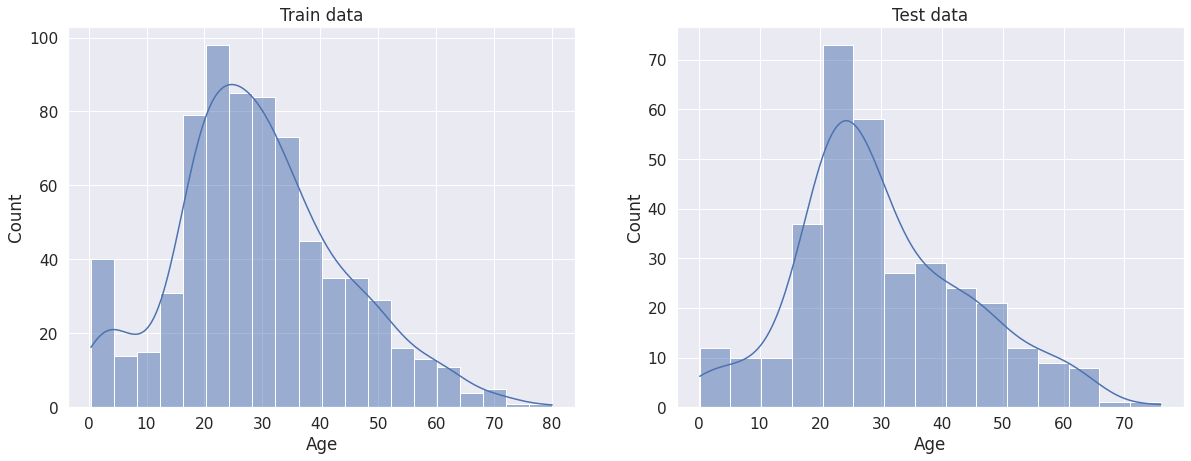

In [160]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.title('Train data')
sns.histplot(x='Age', kde=True, data=train)

plt.subplot(1,2,2)
plt.title('Test data')
sns.histplot(x='Age', kde=True, data=test)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

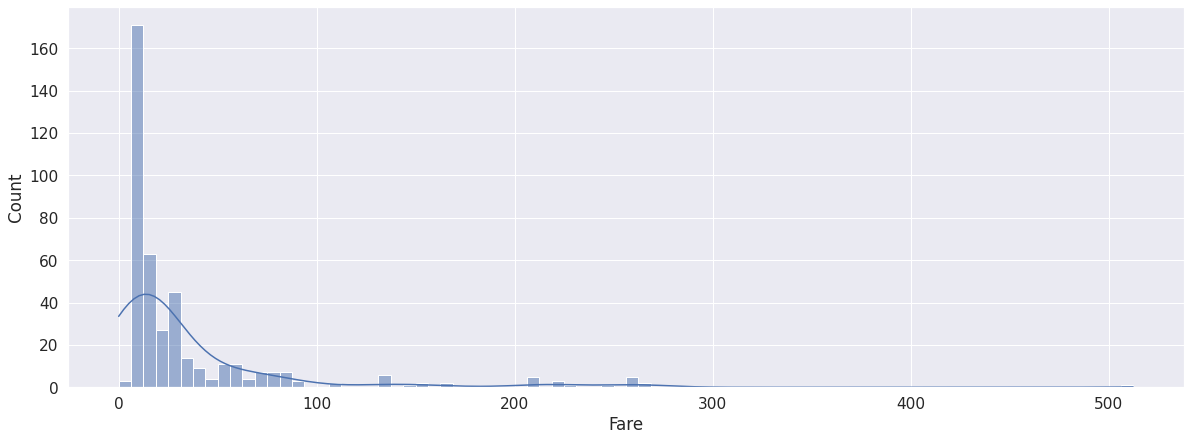

In [161]:
plt.figure(figsize=(20, 7))
sns.histplot(x='Fare', kde=True, data=test)

**Insights:**

Age feature has right skewness, So if we are going to fill missing values we will not use the average.

### Categorical features

In [162]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Outliers

In [163]:
fig=px.box(train, y='Age')
fig.show()

In [164]:
fig=px.box(train, y='Fare')
fig.show()

In [165]:
fig=px.box(train, y='Parch')
fig.show()

In [166]:
fig=px.box(train, y='SibSp')
fig.show()

**Insights:** There are outliers in Fare, Age, SibSp and Parch features. This inspire us for EDA Step.

---

# 4. Exploratory Data Analysis(EDA)

Survival distribution. (Died = 0, Survived = 1)

0    549
1    342
Name: Survived, dtype: int64

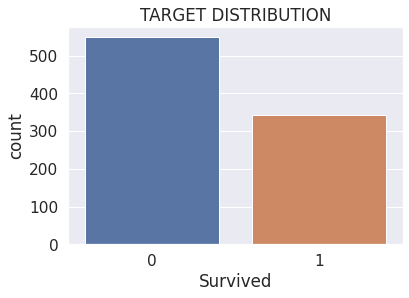

In [167]:
sns.countplot(train['Survived']).set_title("TARGET DISTRIBUTION")

train['Survived'].value_counts()

## Correlational Matrix

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

In [168]:
corr = train.corr()
fig = px.imshow(corr, text_auto = True, aspect = 'auto')
fig.show()

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents
are more likely to travel with their multiple kids and spouses tend to travel together.

### Pclass distribution

Pclass contains the data on ticket class whereby **1- first class, 2- second class, 3- third class**.

3    491
1    216
2    184
Name: Pclass, dtype: int64


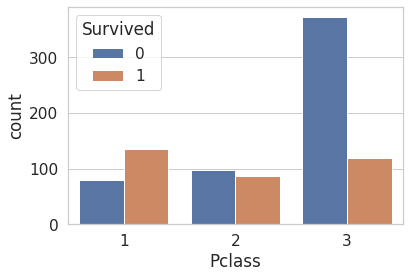

In [169]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train)

print(train['Pclass'].value_counts())

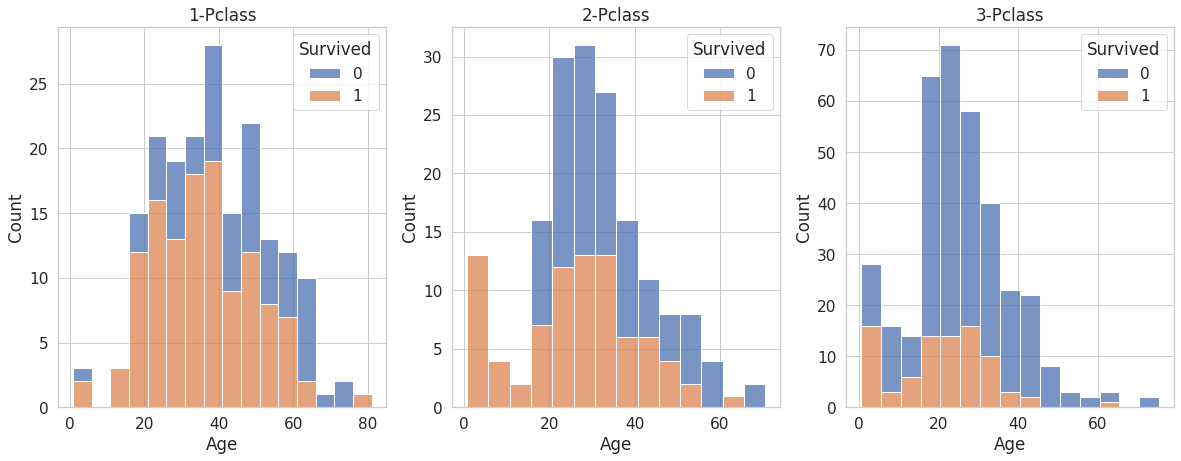

In [170]:
plot , ax = plt.subplots(1 , 3 , figsize=(20,7))

sns.histplot(data = train.loc[train["Pclass"]==1] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],multiple = "stack").set_title("1-Pclass")

sns.histplot(data = train.loc[train["Pclass"]==2] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],multiple = "stack").set_title("2-Pclass")

sns.histplot(data = train.loc[train["Pclass"]==3] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[2],multiple = "stack").set_title("3-Pclass")
plt.show()

Pclass=3 had most passengers and Most of them did not survive.
Infant passengers in Pclass=2 and Pclass=3 mostly survived.
Most passengers in Pclass=1 survived.

### Siblings & spouse on board distribution

<AxesSubplot:xlabel='SibSp', ylabel='count'>

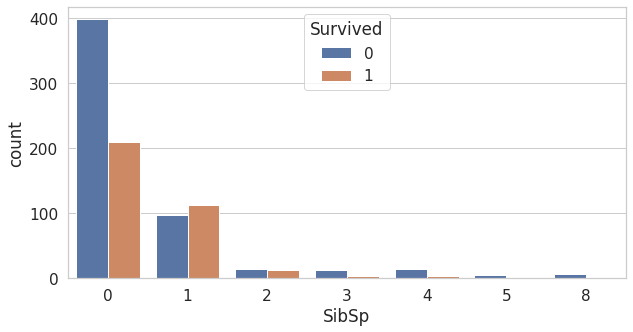

In [171]:
plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=train)

### Parch distribution

<AxesSubplot:xlabel='Parch', ylabel='count'>

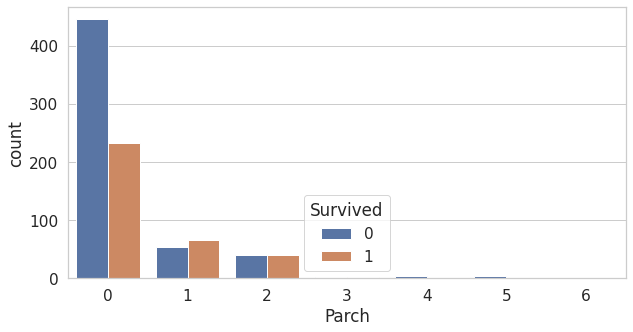

In [172]:
plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Survived',data=train) #parent and children on board

### Age distribution

Text(0.5, 0, 'Age (years)')

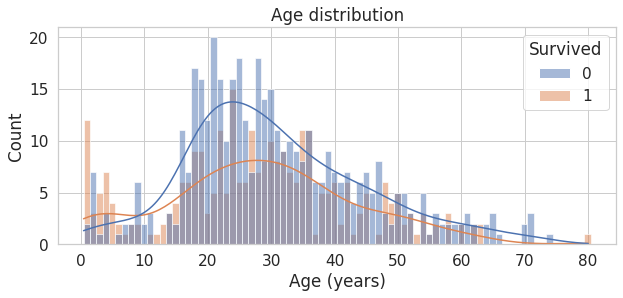

In [173]:
# Figure size
plt.figure(figsize=(10,4))
# Histogram
sns.histplot(data=train, x='Age', hue='Survived', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

**insights:** It's good to convert the age feature to age band groups of length 5.

### Sex distribution

<AxesSubplot:xlabel='Sex', ylabel='count'>

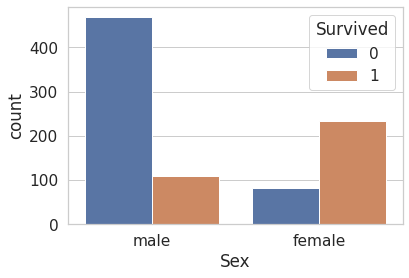

In [174]:
sns.countplot(x='Sex', hue='Survived', data= train)

Text(0.5, 1.0, 'Females')

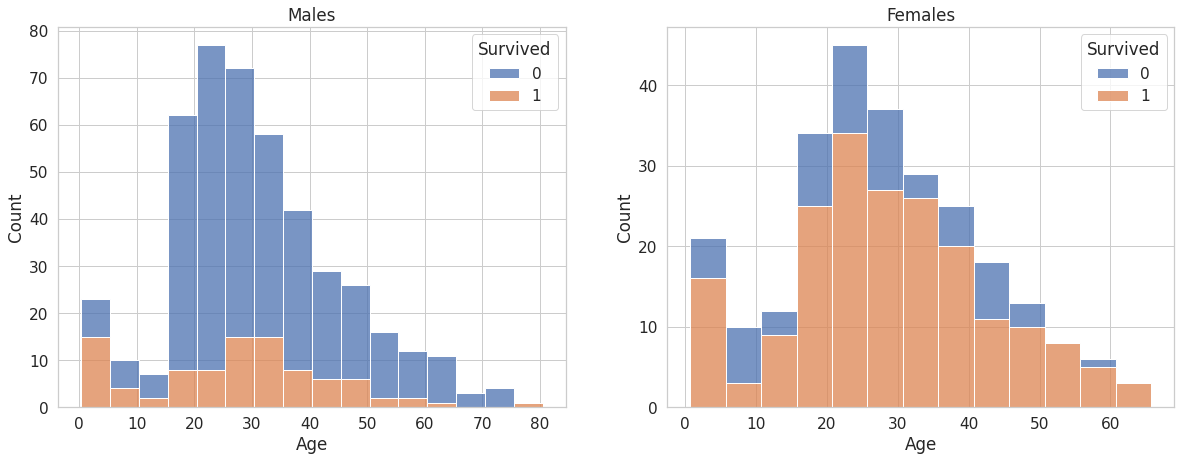

In [175]:
sns.plot , ax = plt.subplots(1 , 2 , figsize=(20,7))
sns.histplot(data = train.loc[train["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],multiple = "stack").set_title("Males")

sns.histplot(data = train.loc[train["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],multiple = "stack").set_title("Females")

### Embarked distribution

<AxesSubplot:xlabel='Survived', ylabel='count'>

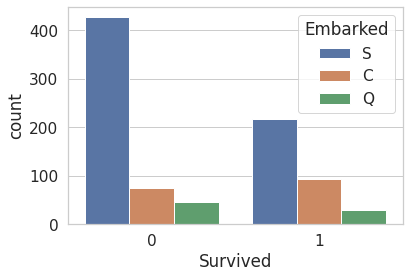

In [176]:
train['Embarked'].value_counts()

sns.countplot(x='Survived',hue='Embarked',data=train) #c-cherbourg, Q-queentown, S-southampton

---

# 5. Data Wrangling

### Drop Un-useful features

In [177]:
train.drop(columns = ["PassengerId", "Ticket", "Cabin"] , inplace = True)
test.drop(columns = ["Ticket", "Cabin"] , inplace = True)

**Dummy Encoding** : It is a concept of changing categroical variable to numeric variable. As an example ,if we have Sex column which has values 'M' for Male and 'F' for female. We can not train or process M and F characters with other numrical data.We need to convert it into numerical values.For this conversion we use Dummy Encoding Technique.

### Converting Embarked to numerical

In [178]:
# train['Embarked']=train['Embarked'].replace(['C','S','Q'],[1,2,3]) #c-cherbourg, Q-queentown, S-southampton
#test['Embarked']=test['Embarked'].replace(['C','S','Q'],[1,2,3])

### Converting Sex to numerical

In [179]:
#train['Sex']=train['Sex'].replace(['female','male'],[0,1])

#test['Sex']=test['Sex'].replace(['female','male'],[0,1])
#test.head()

## Missing values

In [180]:
print('Train data:', '\n', train.isnull().sum())
print('_'*50)
print('Test data:', '\n', test.isnull().sum())

Train data: 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
__________________________________________________
Test data: 
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


<AxesSubplot:title={'center':'Test data'}>

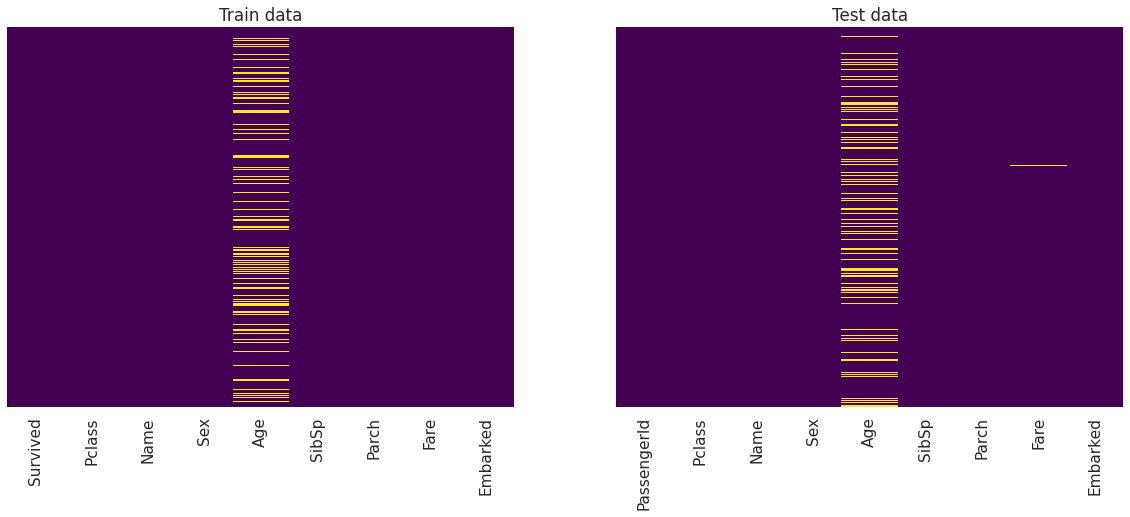

In [181]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.title('Train data')
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

plt.subplot(1,2,2)
plt.title('Test data')
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Filling missing values

In [182]:
# Embarked

train.Embarked.fillna(train.Embarked.dropna().max(), inplace=True)

In [183]:
#Age

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [184]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

In [185]:
# Fare
test.Fare.fillna(test.Fare.dropna().median() , inplace= True)

In [186]:
print(train.isnull().sum())
print(train.shape)
print('_'*50)
print(test.isnull().sum())
print(test.shape)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(891, 9)
__________________________________________________
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(418, 9)


**Insights:** Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

---

# 6. Feature Engineering

## Age band

In [187]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [188]:
test['AgeBand'] = pd.cut(test['Age'], 5)
test.groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,"(0.0942, 15.336]",1109.812500,2.593750,7.156250,1.437500,1.312500,35.929162
1,"(15.336, 30.502]",1101.355102,2.559184,23.853061,0.346939,0.257143,22.022144
2,"(30.502, 45.668]",1096.707865,1.910112,37.662921,0.280899,0.370787,41.447939
3,"(45.668, 60.834]",1113.690476,1.285714,52.059524,0.571429,0.476190,86.171131
4,"(60.834, 76.0]",1028.100000,1.300000,64.500000,0.700000,0.600000,101.777920


## Fare band

In [189]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [190]:
test['FareBand'] = pd.qcut(test['Fare'], 4)
test.groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,PassengerId,Pclass,Age,SibSp,Parch,Fare
3,"(31.472, 512.329]",1115.019048,1.333333,36.123810,0.800000,0.857143,101.474805
2,"(14.454, 31.472]",1086.107843,2.156863,29.295000,0.735294,0.539216,22.704858
1,"(7.896, 14.454]",1101.649485,2.567010,26.220722,0.206186,0.144330,10.868943
0,"(-0.001, 7.896]",1099.026316,2.964912,25.719298,0.070175,0.043860,7.420652


In [191]:
print(train.head())
print("-"*100)
print(test.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked           AgeBand  \
0    male  22.0      1      0   7.2500        S  (16.336, 32.252]   
1  female  38.0      1      0  71.2833        C  (32.252, 48.168]   
2  female  26.0      0      0   7.9250        S  (16.336, 32.252]   
3  female  35.0      1      0  53.1000        S  (32.252, 48.168]   
4    male  35.0      0      0   8.0500        S  (32.252, 48.168]   

          FareBand  
0   (-0.001, 7.91]  
1  (31.0, 512.329]  
2   (7.91, 14.454]  
3  (31.0, 512.329]  
4   (7.91, 14.454]  
--------------

In [192]:
# Create new feature TravelAlone
train['TravelAlone'] = np.where((train['SibSp']+train['Parch']) > 0, 0,1)
test['TravelAlone'] = np.where((test['SibSp']+test['Parch']) > 0, 0,1)

In [193]:
train.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    

In [194]:
# Title
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [195]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [196]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [197]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [198]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test.groupby(['Title'], as_index=False).mean()

,Title,PassengerId,Pclass,Age,Fare,TravelAlone
0,Master,1123.380952,2.714286,10.567143,38.494043,0.047619
1,Miss,1100.240506,2.443038,22.197342,39.678535,0.645570
2,Mr,1101.279167,2.320833,30.562500,25.517014,0.758333
3,Mrs,1090.097222,1.833333,37.263889,59.974249,0.222222
4,Rare,1117.500000,1.333333,43.833333,80.963883,0.500000


In [199]:
# Encode 'Pclass','Sex','Embarked' features using dummy encoding technique.
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked', 'Title', 'AgeBand', 'FareBand'])
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked', 'Title', 'AgeBand', 'FareBand'])

train.drop(['Name'], axis=1 , inplace = True)
test.drop(['Name'], axis=1 , inplace = True)  

In [200]:
train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_Rare,"AgeBand_(0.34, 16.336]","AgeBand_(16.336, 32.252]","AgeBand_(32.252, 48.168]","AgeBand_(48.168, 64.084]","AgeBand_(64.084, 80.0]","FareBand_(-0.001, 7.91]","FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,22.0,7.2500,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,38.0,71.2833,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,26.0,7.9250,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
887,1,19.0,30.0000,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
888,0,24.0,23.4500,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
889,1,26.0,30.0000,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0


In [201]:
test

,PassengerId,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_Rare,"AgeBand_(0.0942, 15.336]","AgeBand_(15.336, 30.502]","AgeBand_(30.502, 45.668]","AgeBand_(45.668, 60.834]","AgeBand_(60.834, 76.0]","FareBand_(-0.001, 7.896]","FareBand_(7.896, 14.454]","FareBand_(14.454, 31.472]","FareBand_(31.472, 512.329]"
0,892,34.5,7.8292,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,893,47.0,7.0000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,894,62.0,9.6875,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,895,27.0,8.6625,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,896,22.0,12.2875,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,24.0,8.0500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
414,1306,39.0,108.9000,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
415,1307,38.5,7.2500,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
416,1308,24.0,8.0500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# 7. Model Building

In [202]:
train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'AgeBand_(0.34, 16.336]', 'AgeBand_(16.336, 32.252]',
       'AgeBand_(32.252, 48.168]', 'AgeBand_(48.168, 64.084]',
       'AgeBand_(64.084, 80.0]', 'FareBand_(-0.001, 7.91]',
       'FareBand_(7.91, 14.454]', 'FareBand_(14.454, 31.0]',
       'FareBand_(31.0, 512.329]'],
      dtype='object')

In [203]:
train_features = ['TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeBand_(0.34, 16.336]', 'AgeBand_(16.336, 32.252]', 'AgeBand_(32.252, 48.168]', 'AgeBand_(48.168, 64.084]', 'AgeBand_(64.084, 80.0]', 'FareBand_(-0.001, 7.91]', 'FareBand_(7.91, 14.454]', 'FareBand_(14.454, 31.0]', 'FareBand_(31.0, 512.329]']
X = train[train_features]
Y = train['Survived']

In [204]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [205]:
models=[LinearSVC(), SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LinearSVM','rbfSVM','KNeighbors','RandoomForestClassifier','DecisionTree','GradientBoostingClassifier','GaussianNb']
accu=[]

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train, y_train)
    pred=clf.predict(x_test)
    accu.append(accuracy_score(pred,y_test))
models={'model':model_names, 'Accuracy':accu}

model_df=pd.DataFrame(models)

model_df

,model,Accuracy
0,LinearSVM,0.804469
1,rbfSVM,0.793296
2,KNeighbors,0.810056
3,RandoomForestClassifier,0.798883
4,DecisionTree,0.815642
5,GradientBoostingClassifier,0.815642
6,GaussianNb,0.798883


## Data Normalization
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1. Attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.

In [206]:
def feature_scaling(x_train, x_test, y_train, y_test, name_scaler):
    models=[LinearSVC, SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]
    accu_score=[]
    for i in range(len(models)):
        clf=models[model]
        clf.fit(x_train, y_train)
        pred=clf.predict(x_test)
        accu_score.append(accuracy_score(pred, y_test))
    model_df[name_scaler]=np.array(accu_score)

In [207]:
scalers=[MinMaxScaler(), StandardScaler()]
names=['Accuracy_MinMax','Accuracy_Standard']
for i in range(len(scalers)):
    scaler=scalers[i]
    scaler.fit(train)
    scaled_df=scaler.transform(train)
    x=scaled_df[:, 0:9]
    Y=train.Survived.to_numpy()
    x_train, x_test, y_train, y_test=train_test_split(x,Y, test_size=0.2, random_state=42)
    feature_scaling(x_train, x_test, y_train, y_test, names[i])
model_df

,model,Accuracy,Accuracy_MinMax,Accuracy_Standard
0,LinearSVM,0.804469,1.0,1.0
1,rbfSVM,0.793296,1.0,1.0
2,KNeighbors,0.810056,1.0,1.0
3,RandoomForestClassifier,0.798883,1.0,1.0
4,DecisionTree,0.815642,1.0,1.0
5,GradientBoostingClassifier,0.815642,1.0,1.0
6,GaussianNb,0.798883,1.0,1.0


In [208]:
scaler=MinMaxScaler()
x=train.drop('Survived',axis=1)
y=train.Survived
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [209]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model, test_accuracy=[], []

### KNN model

In [210]:
params_dict={'n_neighbors': [i+1 for  i in range(50)], 'n_jobs':[3]}
Knn_clf=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=params_dict, scoring='accuracy', cv=10)
Knn_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_jobs': [3],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   scoring='accuracy')

In [211]:
Knn_clf.best_params_

{'n_neighbors': 27, 'n_jobs': 3}

In [212]:
Knn_clf.best_score_

0.8202073552425665

In [213]:
pred=Knn_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('KNN')
test_accuracy.append(accuracy)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7877094972067039


### Support Vector Machines

In [214]:
params_dict={'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','rbf']}
svm_clf=RandomizedSearchCV(estimator=SVC(), param_distributions=params_dict,scoring='accuracy',cv=10)
svm_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [215]:
svm_clf.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

In [216]:
svm_clf.best_score_

0.814612676056338

In [217]:
pred=svm_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('SVM')
test_accuracy.append(accuracy)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.8044692737430168


### Decision tree model

In [218]:
params_dict={'criterion': ['gini','entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf=RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params_dict, scoring='accuracy', cv=10)
dt_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 15, 20, 30, 40, 50,
                                                      70, 90, 120, 150]},
                   scoring='accuracy')

In [219]:
dt_clf.best_params_

{'max_depth': 6, 'criterion': 'entropy'}

In [220]:
dt_clf.best_score_

0.8075704225352112

In [221]:
pred=dt_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('Decision Tree')
test_accuracy.append(accuracy)
print("Decision Tree Accuracy", accuracy)

Decision Tree Accuracy 0.8212290502793296


### Random forest model

In [222]:
params_dict={'n_estimators':[100,200,300,400,500], 'max_features':['auto','sqrt','log2']}
rf_clf=RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_distributions=params_dict, scoring='accuracy', cv=10)
rf_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [223]:
rf_clf.best_params_

{'n_estimators': 300, 'max_features': 'log2'}

In [224]:
rf_clf.best_score_

0.7950312989045383

In [225]:
pred=rf_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('Random Forest')
test_accuracy.append(accuracy)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8212290502793296


### GradientBoosting model

In [226]:
params_dict={'n_estimators':[100,200,300,400,500,600,700]}
gb_clf=RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=params_dict, cv=10)
gb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]})

In [227]:
gb_clf.best_params_

{'n_estimators': 600}

In [228]:
gb_clf.best_score_

0.8287167449139281

In [229]:
pred=gb_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('GardientBoosting')
test_accuracy.append(accuracy)
print("GradientBoosting Accuracy:",accuracy)

GradientBoosting Accuracy: 0.8268156424581006


### Adaboost classifier

In [230]:
params_dict={'n_estimators': list(range(1,201,20))}
ada_clf=GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=100), algorithm='SAMME.R'), param_grid=params_dict, cv=10)
ada_clf.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=100)),
             param_grid={'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [231]:
ada_clf.best_params_

{'n_estimators': 81}

In [232]:
ada_clf.best_score_

0.7823356807511737

In [233]:
pred=ada_clf.predict(x_test)
accuracy=accuracy_score(y_test, pred)

model.append('AdaboostClassifier')
test_accuracy.append(accuracy)
print("AdaBoost Classifier accuracy:",accuracy)

AdaBoost Classifier accuracy: 0.8044692737430168


In [234]:
final=pd.DataFrame({'model':model,'Test Accuracy': test_accuracy})

In [235]:
final

,model,Test Accuracy
0,KNN,0.787709
1,SVM,0.804469
2,Decision Tree,0.821229
3,Random Forest,0.821229
4,GardientBoosting,0.826816
5,AdaboostClassifier,0.804469


In [236]:
#ckeck for null values
print(test.isnull().sum())
print("-"*100)
print("Train dataset:", train.shape)
print("", len(train_features))
print("-"*100)
print("Test dataset:", test.shape)
test.columns

PassengerId                   0
Age                           0
Fare                          0
TravelAlone                   0
Pclass_1                      0
Pclass_2                      0
Pclass_3                      0
Sex_female                    0
Sex_male                      0
Embarked_C                    0
Embarked_Q                    0
Embarked_S                    0
Title_Master                  0
Title_Miss                    0
Title_Mr                      0
Title_Mrs                     0
Title_Rare                    0
AgeBand_(0.0942, 15.336]      0
AgeBand_(15.336, 30.502]      0
AgeBand_(30.502, 45.668]      0
AgeBand_(45.668, 60.834]      0
AgeBand_(60.834, 76.0]        0
FareBand_(-0.001, 7.896]      0
FareBand_(7.896, 14.454]      0
FareBand_(14.454, 31.472]     0
FareBand_(31.472, 512.329]    0
dtype: int64
----------------------------------------------------------------------------------------------------
Train dataset: (891, 26)
 23
-------------------------

Index(['PassengerId', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'AgeBand_(0.0942, 15.336]', 'AgeBand_(15.336, 30.502]',
       'AgeBand_(30.502, 45.668]', 'AgeBand_(45.668, 60.834]',
       'AgeBand_(60.834, 76.0]', 'FareBand_(-0.001, 7.896]',
       'FareBand_(7.896, 14.454]', 'FareBand_(14.454, 31.472]',
       'FareBand_(31.472, 512.329]'],
      dtype='object')

In [237]:
test.drop(['Age'], axis=1 , inplace = True)
test.drop(['Fare'], axis=1 , inplace = True) 

In [238]:
test_id=test['PassengerId']
submission_pred = clf.predict(test.drop('PassengerId', axis=1))

df=pd.DataFrame({"PassengerId":test_id.values,"Survived":submission_pred,})

In [239]:
#save the predictions in the csv file
df.to_csv("Submission.csv",index=False)

In [240]:
df=pd.read_csv('Submission.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [241]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
